<a href="https://colab.research.google.com/github/albertebaht/02456-deeplearning-project/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install --quiet neo4j openai community pyvis py2neo



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.5 MB/s eta 0:00:00


In [4]:
from neo4j import GraphDatabase
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [5]:
from google.colab import userdata

NEO4J_URI = userdata.get('NEO4J_URI')
NEO4J_USERNAME = 'neo4j'
NEO4J_PASSWORD = userdata.get('NEO4J_PASSWORD')
NEO4J_DATABASE = 'neo4j'
NEO4J_URL = userdata.get('NEO4J_URL')
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

<ipython-input-33-f6b4cd93a3ea>:17: DeprecationWarning: `id` is deprecated, use `element_id` instead
  node1_name = node1.get("name", f"Node-{node1.id}")
<ipython-input-33-f6b4cd93a3ea>:20: DeprecationWarning: `id` is deprecated, use `element_id` instead
  print(node1.id)


8
Node-8


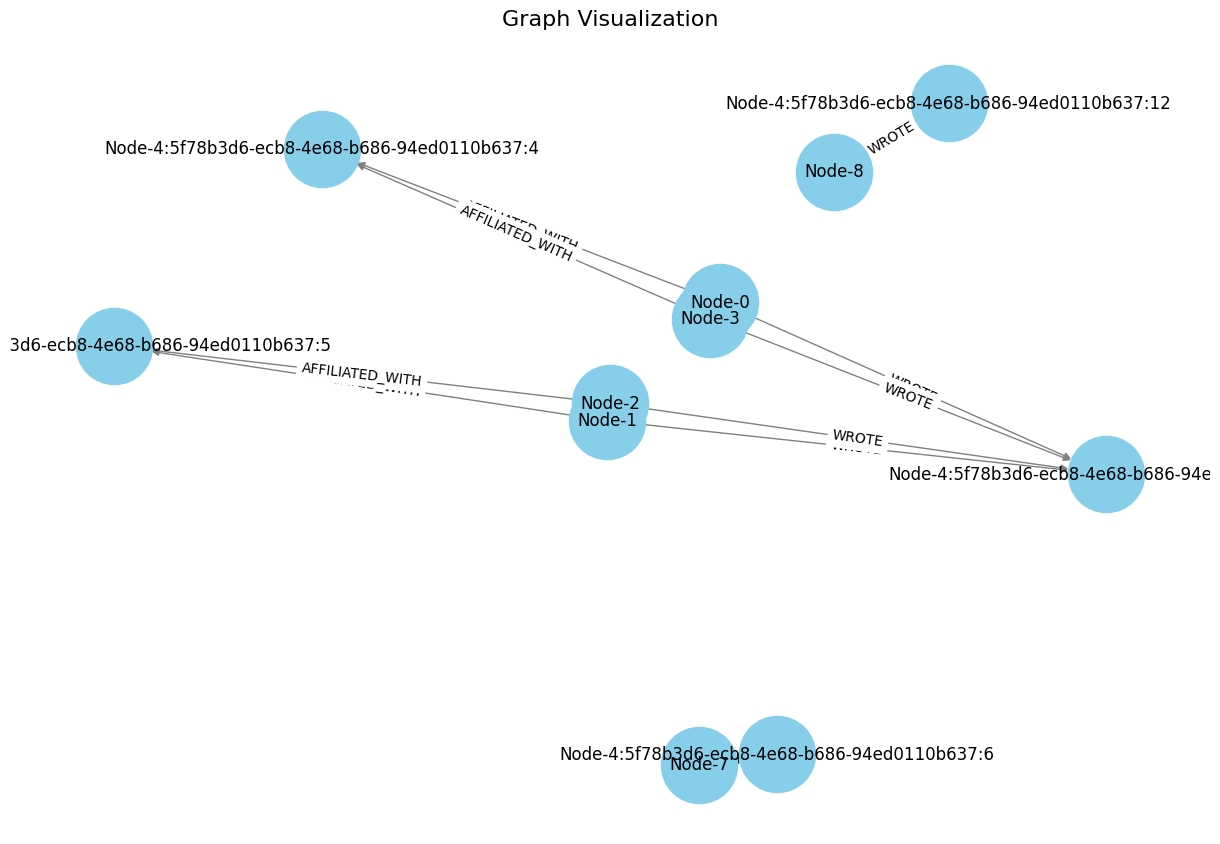

In [ ]:
# Create a driver to connect to Neo4j
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

def fetch_graph():
    with driver.session() as session:
        query = """
        MATCH (n)-[r]->(m)
        RETURN n, r, m
        LIMIT 10
        """
        result = session.run(query)
        graph_data = []
        for record in result:
            node1 = record["n"]
            node2 = record["m"]
            relationship = record["r"]
            node1_name = node1.get("name", f"Node-{node1.id}")
            node2_name = node2.get("name", f"Node-{node2.element_id}")
            graph_data.append((node1_name, node2_name, relationship.type))
        print(node1.id)
        print(node1_name)
        return graph_data


# Create PyVis graph
def visualize_with_networkx(graph_data):
    G = nx.DiGraph()  # Directed graph
    for node1, node2, relationship in graph_data:
        # Add nodes and edges
        G.add_node(node1)
        G.add_node(node2)
        G.add_edge(node1, node2, label=relationship)

    # Create layout and visualize
    pos = nx.spring_layout(G)  # Layout for better spacing
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, edge_color="gray")
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Graph Visualization", fontsize=16)
    plt.show()



# Execute
graph_data = fetch_graph()
#print(data)
visualize_with_networkx(graph_data)

# Graph Structure Analysis
**Degree Centrality**
Degree centrality measures the number of edges connected to a node. Nodes with high degree centrality are considered important or influential within the graph.

In [ ]:
# Create the graph using the data
G = nx.DiGraph()
for node1, node2, relationship in graph_data:
    G.add_node(node1)
    G.add_node(node2)
    G.add_edge(node1, node2, label=relationship)

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)

# Optionally, plot the degree centrality of the top 10 nodes
top_10 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_10)

{'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7': 0.1020408163265306, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:1': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:5': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:2': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:3': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6': 0.02040816326530612, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:8': 0.02040816326530612, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:12': 0.08163265306122448, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:9': 0.02040816326530612, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:10': 0.02040816326530612, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:11': 0.02040816326530612, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:13': 0.02040816326530612, 'Node-4:5f78b3d6

**Betweenness Centrality**
Betweenness centrality measures how often a node appears on the shortest path between two other nodes. It's useful for identifying nodes that act as bridges within the graph.

In [ ]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print(betweenness_centrality)


{'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7': 0.0017006802721088435, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:1': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:5': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:2': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:3': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:8': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:12': 0.0012755102040816326, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:9': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:10': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:11': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:13': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:15': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:14': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:16': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed01

**Closeness Centraliy**
Closeness centrality measures how close a node is to all other nodes in the graph. A high closeness centrality indicates that the node can quickly reach all others.

In [ ]:
# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)


{'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7': 0.08163265306122448, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:1': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:5': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:2': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:3': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6': 0.05668934240362812, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:8': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:12': 0.061224489795918366, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:9': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:10': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:11': 0.0466472303206997, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:13': 0.0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:15': 0.04081632653061224, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:14': 0.0, 'Node-4:5f78b3d6-

**Clustering Coefficient**

The clustering coefficient measures how connected a node’s neighbors are to each other. A high clustering coefficient means the node is part of a tightly-knit community.

In [ ]:
# Compute clustering coefficient
clustering_coefficient = nx.clustering(G)
print(clustering_coefficient)


{'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:1': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:5': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:2': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:3': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:8': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:12': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:9': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:10': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:11': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:13': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:15': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:14': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:16': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:19': 0, 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:20': 0, 'N

# Community Detection
Identifying communities or clusters within the graph helps uncover subgroups of nodes that are more densely connected to each other. This can be useful for finding "communities" or groups in social networks.

**Girvan-Newman Algorithm**



In [ ]:
from networkx.algorithms.community import girvan_newman

# Find communities using Girvan-Newman
communities = girvan_newman(G)
top_level_communities = next(communities)
print(top_level_communities)


({'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:5', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:2', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:3', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:1', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4'}, {'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:8', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:10', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:12', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:9', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:11'}, {'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:15', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:13', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:14'}, {'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:19', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:18', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:16', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:20', 'N

#Graph Path Analysis

Understanding the shortest paths and connections in your graph can reveal key insights into how nodes are related.

**Shortest Path**

If you're interested in finding the shortest path between two nodes, you can use networkx's shortest_path function.

In [ ]:
# Find shortest path between two nodes
shortest_path = nx.shortest_path(G, source="Node-4", target="Node-6")
print(shortest_path)


NodeNotFound: Source Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637 is not in G

**All pairs shortest path**

In [ ]:
# Compute shortest paths between all pairs of nodes
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))
for source, paths in all_shortest_paths.items():
    print(f"From {source}: {paths}")


From Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0: {'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0': ['Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0'], 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4': ['Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4'], 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7': ['Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7'], 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6': ['Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:0', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7', 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:6']}
From Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4: {'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4': ['Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:4']}
From Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7: {'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7': ['Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:7'], 'Node-4:5f78b3d6-ecb8-4e68-b686-94ed0110b637:

# Graph Metrics

**Graph Diameter**
The diameter is the longest shortest path in the graph.


In [ ]:
# Calculate graph diameter
diameter = nx.diameter(G)
print(f"Graph Diameter: {diameter}")


NetworkXError: Found infinite path length because the digraph is not strongly connected

** Average Path Length
The average number of edges required to travel between all pairs of nodes in the graph

In [ ]:
avg_path_length = nx.average_shortest_path_length(G)
print(f"Average Path Length: {avg_path_length}")

NetworkXError: Graph is not strongly connected.

** Density **
Measures how many edges exist in the graph relative to the number of possible edges

In [ ]:
# Calculate graph density
density = nx.density(G)
print(f"Graph Density: {density}")


Graph Density: 0.02040816326530612


# Advanced Graph Analysis
**Graph Traversals**

Graph traversal techniques like Depth-First Search (DFS) or Breadth-First Search (BFS) can be used to explore the graph.

Example of DFS:




# Subgraph with nodes that have high degree centrality
high_degree_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
subgraph = G.subgraph(high_degree_nodes)

In [ ]:
# Depth-First Search
dfs = list(nx.dfs_edges(G, source="Node-4"))
print(dfs)

**Subgraph Extraction**
You can extract subgraphs based on certain node or edge attributes. For example, if you are only interested in nodes with a certain centrality value or community, you can extract that subgraph.

In [ ]:
# Subgraph with nodes that have high degree centrality
high_degree_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
subgraph = G.subgraph(high_degree_nodes)


In [19]:
from py2neo import Graph

# Connect to the Neo4j database
graph = Graph(NEO4J_URI, auth=("neo4j", NEO4J_PASSWORD))


<ipython-input-17-0b0d6b2a75f0>:27: DeprecationWarning: read_transaction has been renamed to execute_read
  graph = session.read_transaction(fetch_graph)
<ipython-input-17-0b0d6b2a75f0>:17: DeprecationWarning: `id` is deprecated, use `element_id` instead
  graph.add_node(node_a.id, label=node_a.labels, name=node_a.get("name", ""))
<ipython-input-17-0b0d6b2a75f0>:18: DeprecationWarning: `id` is deprecated, use `element_id` instead
  graph.add_node(node_b.id, label=node_b.labels, name=node_b.get("name", ""))
<ipython-input-17-0b0d6b2a75f0>:21: DeprecationWarning: `id` is deprecated, use `element_id` instead
  graph.add_edge(node_a.id, node_b.id, type=rel.type)


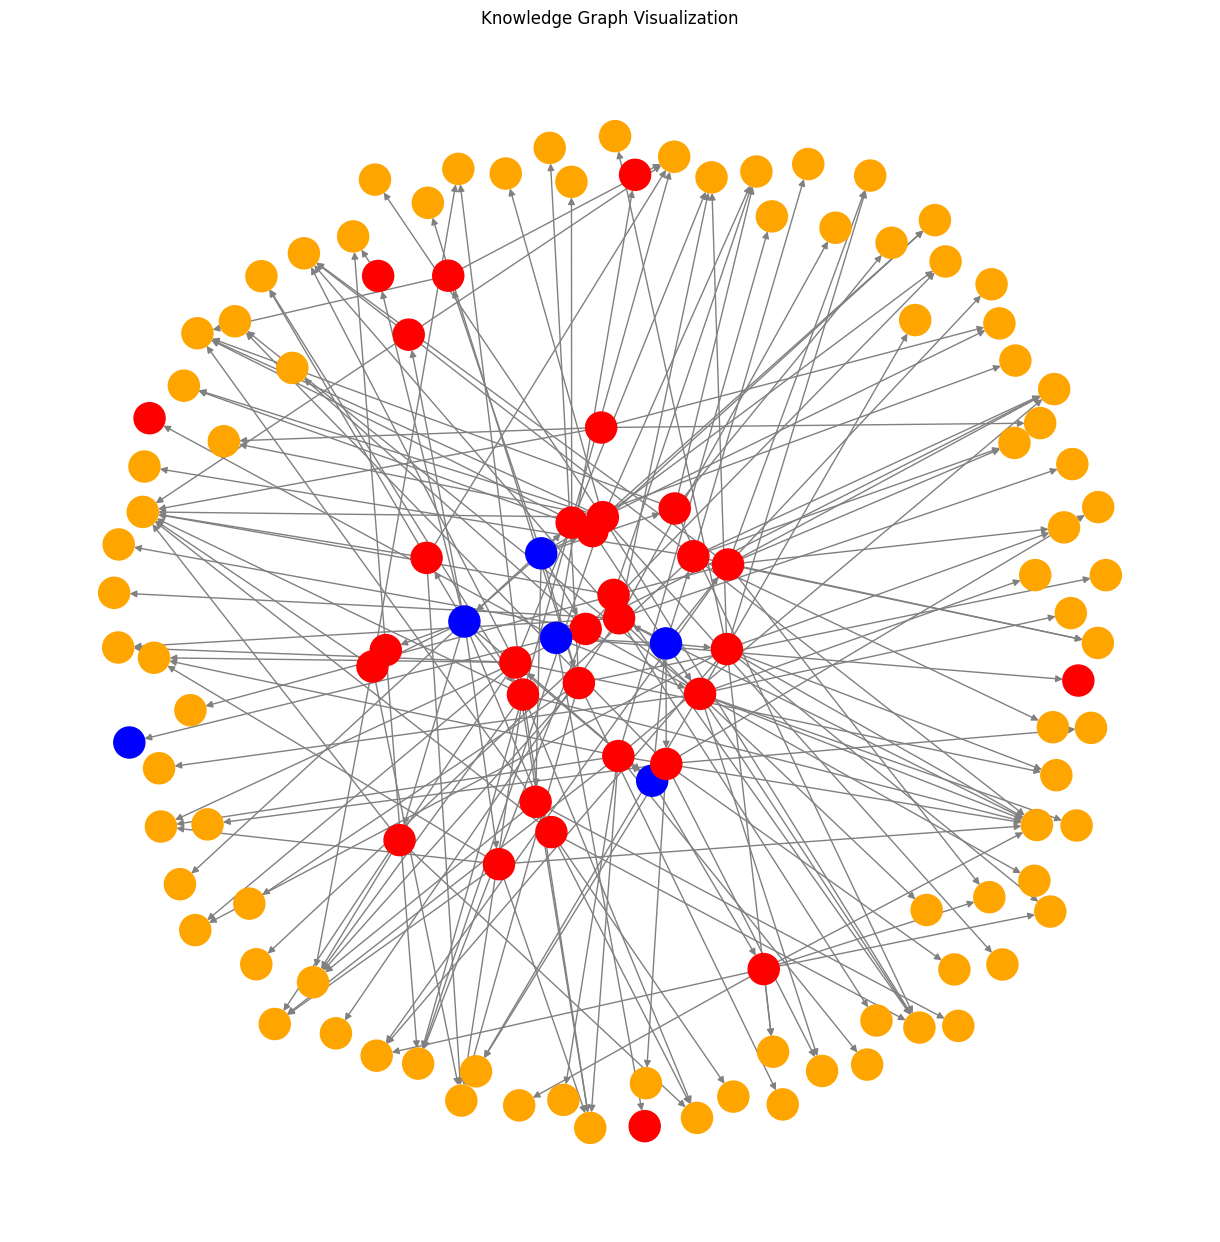

In [17]:
driver = GraphDatabase.driver(NEO4J_URI, auth=('neo4j', NEO4J_PASSWORD))

def fetch_graph(tx):
    query = """
    MATCH (n)-[r]->(m)
    RETURN n, r, m LIMIT 200
    """
    results = tx.run(query)
    graph = nx.DiGraph()

    for record in results:
        node_a = record["n"]
        node_b = record["m"]
        rel = record["r"]

        # Add nodes with their labels
        graph.add_node(node_a.id, label=node_a.labels, name=node_a.get("name", ""))
        graph.add_node(node_b.id, label=node_b.labels, name=node_b.get("name", ""))

        # Add edges with their relationship type
        graph.add_edge(node_a.id, node_b.id, type=rel.type)

    return graph

# Fetch graph from Neo4j
with driver.session() as session:
    graph = session.read_transaction(fetch_graph)

# Close the Neo4j connection
driver.close()

# Visualization
def draw_graph(graph):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph)  # Force-directed layout

    # Color nodes by their labels
    node_colors = []
    for node_id in graph.nodes():
        labels = graph.nodes[node_id]['label']
        if 'AtomicFact' in labels:
            node_colors.append('red')
        elif 'Chunk' in labels:
            node_colors.append('blue')
        elif 'Document' in labels:
            node_colors.append('green')
        elif 'KeyElement' in labels:
            node_colors.append('orange')
        else:
            node_colors.append('gray')

    # Draw the graph
    nx.draw(
        graph,
        pos,
        with_labels=True,
        labels=nx.get_node_attributes(graph, 'name'),
        node_color=node_colors,
        node_size=500,
        font_size=8,
        edge_color="gray",
    )

    plt.title("Knowledge Graph Visualization")
    plt.show()

# Draw the graph
draw_graph(graph)


<ipython-input-41-3ab34bfcf85d>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=12, font_weight="bold", edge_color="gray", cmap=plt.cm.get_cmap('tab20'))
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


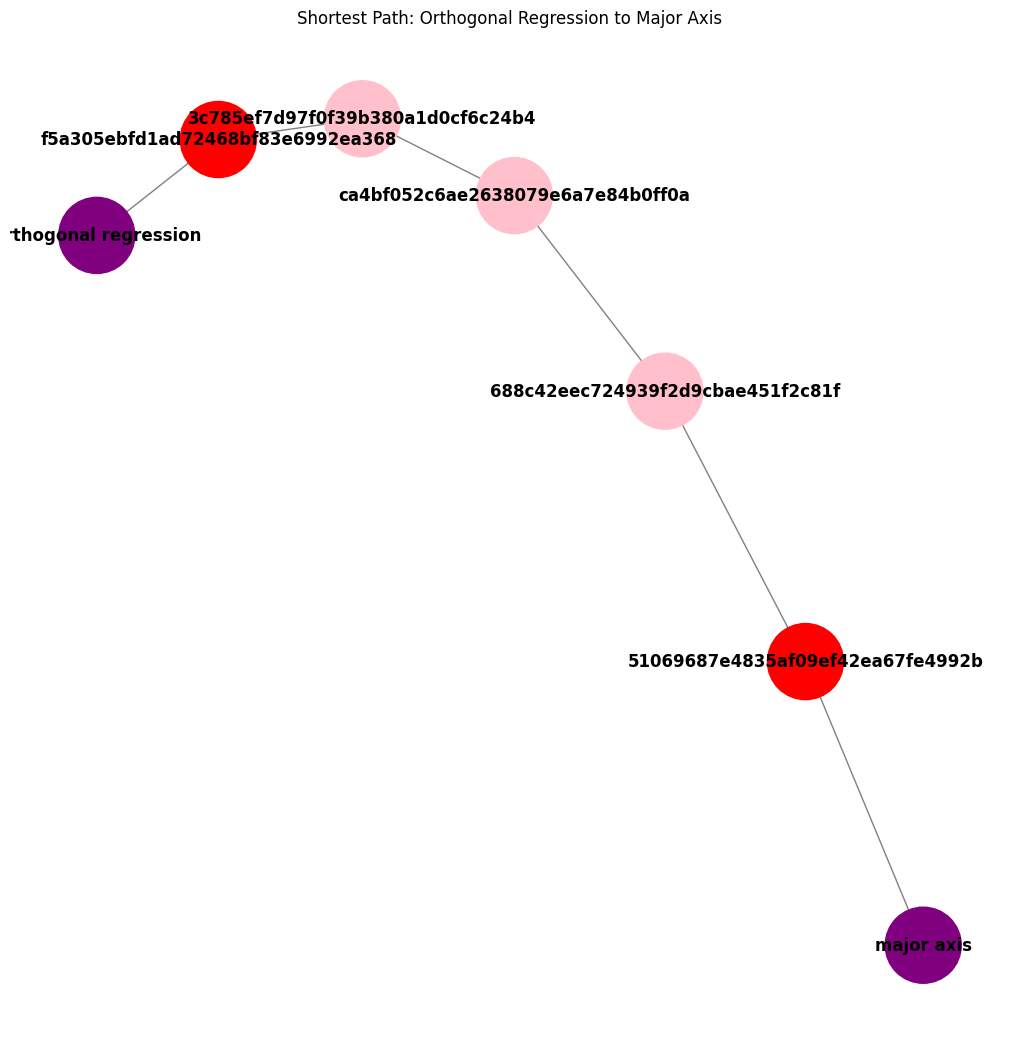

In [41]:
# Run the Cypher query to find the shortest path and process the result immediately
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Run the Cypher query to find the shortest path
def get_shortest_path():
    with driver.session() as session:
        cypher_query = """
        MATCH p = shortestPath((n1 {id: 'orthogonal regression'})-[*]-(n2 {id: 'major axis'}))
        RETURN p
        """
        result = session.run(cypher_query)
        # Consume the result and store it in a list
        return list(result) # this will save a copy of the result

# Get the shortest path
result = get_shortest_path()

# Define node colors based on the type
node_type_colors = {
    'Document': 'blue',
    'AtomicFact': 'red',
    'Chunk': 'pink',
    'KeyElement': 'purple'
}

# Extract nodes and relationships for visualization
nodes = []
edges = []
node_colors = []

for record in result: # Now you can safely iterate multiple times
    path = record["p"]
    for node in path.nodes:
        nodes.append(node["id"])  # Assuming 'name' is a property of your nodes
        # Get the type of the node and assign a color based on the type
        # Updated line to handle frozenset
        node_type = next(iter(node.labels), 'Unknown')  # Assuming the label is the first in the list
        node_colors.append(node_type_colors.get(node_type, 'gray'))  # Default to 'gray' if type not found
    for rel in path.relationships:
        edges.append((rel.start_node["id"], rel.end_node["id"]))  # Assuming 'name' is a property of your nodes

# Create a NetworkX graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Visualize the graph with colors based on node types
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout for the nodes

# Draw the graph with node colors based on their type
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=12, font_weight="bold", edge_color="gray", cmap=plt.cm.get_cmap('tab20'))
plt.title("Shortest Path: Orthogonal Regression to Major Axis")
plt.show()